<a href="https://colab.research.google.com/github/RobinMikeal/Geol558/blob/main/GEOL558_Proj_3_Supervised_Regression_EDA_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CONCEPT:  USE Quarterly sampling data to define plume stability (is a plume (not just a well) increasing/decreasing or stable.  What is the center of mass per contaminant?  What is the total mass concentration above some threshold (barrier line - like an MCL)?  Are certain wells not needed to be sampled while still maintaining delineation within that barrier line? What do we expect the concentration to do next time based on the last 4+ events?

In [43]:
!pip install PyLEnM --upgrade


In [44]:
#imports
import pylenm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl # Import matplotlib
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.dates as mdates
import numpy as np
from scipy.stats import iqr  # Import iqr function if you are not sure of number of histogram bins
import warnings
from pylenm import PylenmDataFactory

In [45]:
warnings.filterwarnings("ignore")  # Ignore all warnings
pd.set_option('display.max_rows', 50) # Display a custom number of rows for dataframe

# Set the default font family to a font that is available
plt.rcParams['font.family'] = 'sans-serif'

In [46]:
# path to my CSV file in Github
file_pathChem = 'https://raw.githubusercontent.com/RobinMikeal/Geol558/main/GroundwaterAnalytical_reducedv1.csv'
file_pathElev = 'https://raw.githubusercontent.com/RobinMikeal/Geol558/main/GW_Elev.csv'
file_pathField = 'https://raw.githubusercontent.com/RobinMikeal/Geol558/main/GW_FieldParams.csv'

# Read the CSV files
dfChem = pd.read_csv(file_pathChem)
dfElev = pd.read_csv(file_pathElev)
dfField = pd.read_csv(file_pathField)

# Check for W-001R

# Display only rows where LOC_NAME is 'W-001R'
W001RChem = dfChem[dfChem['LOC_NAME'] == 'W-001R']
print("Rows where LOC_NAME is 'W-001R':")
display(W001RChem)

# Display only rows where LOC_NAME is 'W-001R'
W001RElev = dfElev[dfElev['loc_name'] == 'W-001R']
print("Rows where loc_name is 'W-001R':")
display(W001RElev)

# Display only rows where LOC_NAME is 'W-001R'
W001RField = dfField[dfField['LOC_NAME'] == 'W-001R']
print("Rows where LOC_NAME is 'W-001R':")
display(W001RField)

Rows where LOC_NAME is 'W-001R':


,LOC_NAME,SAMPLE_DATE,SAMPLEDATE,SAMPLETIME,MATRIX_CODE,TASK_CODE,ANALYTIC_METHOD,CAS_RN,CHEMICAL_NAME,REPORT_RESULT_TEXT,REPORT_RESULT_VALUE,REPORT_RESULT_UNIT,REPORT_RESULT_LIMIT,REPORT_METHOD_DETECTION_LIMIT,DETECT_FLAG,LAB_QUALIFIERS,X_COORD,Y_COORD
190,W-001R,4/15/2020,15-Apr-20,11:33,WG,2020-Q2-GW,E353.2,NO3-N,Nitrate as N,2,2.00,mg/L,0.1,0.050,Y,NaN,2024255.52,745689.84
191,W-001R,4/15/2020,15-Apr-20,11:33,WG,2020-Q2-GW,SW8260D,127-18-4,Tetrachloroethene,1.7,1.70,ug/L,1.0,0.400,Y,NaN,2024255.52,745689.84
192,W-001R,4/15/2020,15-Apr-20,11:33,WG,2020-Q2-GW,SW8260D,156-59-2,"cis-1,2-Dichloroethene",< 1,1.00,ug/L,1.0,0.400,N,U,2024255.52,745689.84
193,W-001R,4/15/2020,15-Apr-20,11:33,WG,2020-Q2-GW,SW8260D,75-01-4,Vinyl chloride,< 1,1.00,ug/L,1.0,0.400,N,U,2024255.52,745689.84
194,W-001R,4/15/2020,15-Apr-20,11:33,WG,2020-Q2-GW,SW8260D,79-01-6,Trichloroethene,< 1,1.00,ug/L,1.0,0.400,N,U,2024255.52,745689.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8153,W-001R,10/4/2024,4-Oct-24,9:35,WG,2024-Q4-GW,HASL300-M-TC02RC,14133-76-7,Technetium-99,-1.83,-1.83,pCi/L,5.0,4.390,Y,U,2024255.52,745689.84
8888,W-001R,10/4/2024,4-Oct-24,9:35,WG,2024-Q4-GW,SW8260D,127-18-4,Tetrachloroethene,1.35,1.35,ug/L,0.6,0.300,Y,J5 T8,2024255.52,745689.84
8889,W-001R,10/4/2024,4-Oct-24,9:35,WG,2024-Q4-GW,SW8260D,156-59-2,"cis-1,2-Dichloroethene",< 0.500,0.50,ug/L,0.5,0.126,N,J5 T8 U,2024255.52,745689.84
8890,W-001R,10/4/2024,4-Oct-24,9:35,WG,2024-Q4-GW,SW8260D,75-01-4,Vinyl chloride,< 0.500,0.50,ug/L,0.5,0.234,N,T8 U,2024255.52,745689.84


Rows where loc_name is 'W-001R':


,loc_name,loc_group,measurement_date,Ref_elev,GW_elev,Well_Depth,depth_unit,DepthToWater,task_code,x_coord,y_coord
113,W-001R,Wells Lower Surficial,10/21/2024,136.95,128.08,33.2,ft,8.87,2024-Q4-WL,2024255.52,745689.84


Rows where LOC_NAME is 'W-001R':


,LOC_NAME,SAMPLE_DATE,SAMPLEDATE,TASK_CODE,CHEMICAL_NAME,ORGANIC_YN,REPORT_RESULT_TEXT,REPORT_RESULT_VALUE,REPORT_RESULT_UNIT,X_COORD,Y_COORD
84,W-001R,4/13/2023,13 Apr 2023,2023-Q2-GW,pH,NaN,5.59,5.59000,SU,2024255.52,745689.84
149,W-001R,4/13/2023,13 Apr 2023,2023-Q2-GW,Odor,NaN,NaN,NaN,NaN,2024255.52,745689.84
268,W-001R,4/13/2023,13 Apr 2023,2023-Q2-GW,Temperature,NaN,19.76,19.76000,degC,2024255.52,745689.84
386,W-001R,4/13/2023,13 Apr 2023,2023-Q2-GW,Dissolved Oxygen,NaN,4.58,4.58000,mg/L,2024255.52,745689.84
504,W-001R,4/13/2023,13 Apr 2023,2023-Q2-GW,Turbidity,NaN,0,0.00000,NTU,2024255.52,745689.84
621,W-001R,4/13/2023,13 Apr 2023,2023-Q2-GW,Color,NaN,Clear,NaN,NaN,2024255.52,745689.84
740,W-001R,4/13/2023,13 Apr 2023,2023-Q2-GW,ORP,NaN,83.7,83.70000,mv,2024255.52,745689.84
858,W-001R,4/13/2023,13 Apr 2023,2023-Q2-GW,Conductivity,NaN,75.90081,75.90081,us/cm,2024255.52,745689.84
1021,W-001R,10/13/2023,13 Oct 2023,2023-Q4-GW,pH,NaN,5.66,5.66000,SU,2024255.52,745689.84
1133,W-001R,10/13/2023,13 Oct 2023,2023-Q4-GW,Odor,NaN,NaN,NaN,NaN,2024255.52,745689.84


In [47]:
# Append the data in dfField into dfChem
dfChem_Field = pd.concat([dfChem, dfField], ignore_index=True)

# Display only rows where LOC_NAME is 'W-001R' and TASK_CODE is '2024-Q4-GW'
W001RChem_Field = dfChem_Field[(dfChem_Field['LOC_NAME'] == 'W-001R') & (dfChem_Field['TASK_CODE'] == '2024-Q4-GW')]
print("Rows where LOC_NAME is 'W-001R' and TASK_CODE is '2024-Q4-GW':")
display(W001RChem_Field)

Rows where LOC_NAME is 'W-001R' and TASK_CODE is '2024-Q4-GW':


,LOC_NAME,SAMPLE_DATE,SAMPLEDATE,SAMPLETIME,MATRIX_CODE,TASK_CODE,ANALYTIC_METHOD,CAS_RN,CHEMICAL_NAME,REPORT_RESULT_TEXT,REPORT_RESULT_VALUE,REPORT_RESULT_UNIT,REPORT_RESULT_LIMIT,REPORT_METHOD_DETECTION_LIMIT,DETECT_FLAG,LAB_QUALIFIERS,X_COORD,Y_COORD,ORGANIC_YN
7978,W-001R,10/4/2024,4-Oct-24,9:35,WG,2024-Q4-GW,E300.0,16984-48-8,Fluoride,< 0.10,0.10,mg/L,0.10,0.025,N,U,2024255.52,745689.84,NaN
7979,W-001R,10/4/2024,4-Oct-24,9:35,WG,2024-Q4-GW,E353.2,NO3-N,Nitrate as N,1.5,1.50,mg/L,0.04,0.020,Y,S,2024255.52,745689.84,NaN
8152,W-001R,10/4/2024,4-Oct-24,9:35,WG,2024-Q4-GW,CALC,TOTAL-U,Total Uranium Isotopes,< 0.200,0.20,ug/L,0.20,0.067,N,U,2024255.52,745689.84,NaN
8153,W-001R,10/4/2024,4-Oct-24,9:35,WG,2024-Q4-GW,HASL300-M-TC02RC,14133-76-7,Technetium-99,-1.83,-1.83,pCi/L,5.00,4.390,Y,U,2024255.52,745689.84,NaN
8888,W-001R,10/4/2024,4-Oct-24,9:35,WG,2024-Q4-GW,SW8260D,127-18-4,Tetrachloroethene,1.35,1.35,ug/L,0.60,0.300,Y,J5 T8,2024255.52,745689.84,NaN
8889,W-001R,10/4/2024,4-Oct-24,9:35,WG,2024-Q4-GW,SW8260D,156-59-2,"cis-1,2-Dichloroethene",< 0.500,0.50,ug/L,0.50,0.126,N,J5 T8 U,2024255.52,745689.84,NaN
8890,W-001R,10/4/2024,4-Oct-24,9:35,WG,2024-Q4-GW,SW8260D,75-01-4,Vinyl chloride,< 0.500,0.50,ug/L,0.50,0.234,N,T8 U,2024255.52,745689.84,NaN
8891,W-001R,10/4/2024,4-Oct-24,9:35,WG,2024-Q4-GW,SW8260D,79-01-6,Trichloroethene,< 0.500,0.50,ug/L,0.50,0.190,N,J5 T8 U,2024255.52,745689.84,NaN
11731,W-001R,10/4/2024,04 Oct 2024,NaN,NaN,2024-Q4-GW,NaN,NaN,pH,5.67,5.67,SU,NaN,NaN,NaN,NaN,2024255.52,745689.84,NaN
11952,W-001R,10/4/2024,04 Oct 2024,NaN,NaN,2024-Q4-GW,NaN,NaN,Temperature,23.64,23.64,degC,NaN,NaN,NaN,NaN,2024255.52,745689.84,NaN


In [48]:
# Create the pivot table
df = dfChem_Field.pivot_table(
    index=['LOC_NAME', 'SAMPLE_DATE','TASK_CODE', 'X_COORD', 'Y_COORD'],
    columns='CHEMICAL_NAME',
    values='REPORT_RESULT_VALUE',  # Assuming 'Result' contains the values you want to aggregate
    aggfunc='first'  # You can change this to 'mean', 'sum', 'count', etc., depending on how you want to aggregate
)

# Reset the index to make 'LOC_NAME' and other index levels into regular columns
df = df.reset_index()

# Print the pivot table
#df
# Display only rows where LOC_NAME is 'W-001R' and TASK_CODE is '2024-Q4-GW'
W001Rdf = df[(df['LOC_NAME'] == 'W-001R') & (df['TASK_CODE'] == '2024-Q4-GW')]
print("Rows where LOC_NAME is 'W-001R' and TASK_CODE is '2024-Q4-GW':")
display(W001Rdf)

Rows where LOC_NAME is 'W-001R' and TASK_CODE is '2024-Q4-GW':


CHEMICAL_NAME,LOC_NAME,SAMPLE_DATE,TASK_CODE,X_COORD,Y_COORD,Conductivity,Dissolved Oxygen,Fluoride,Nitrate as N,ORP,Technetium-99,Temperature,Tetrachloroethene,Total Uranium Isotopes,Trichloroethene,Turbidity,Vinyl chloride,"cis-1,2-Dichloroethene",pH
4,W-001R,10/4/2024,2024-Q4-GW,2024255.52,745689.84,78.4,4.74,0.1,1.5,242.4,-1.83,23.64,1.35,0.2,0.5,0.0,0.5,0.5,5.67


In [49]:
# Print a list of the fields in df
fields_list = df.columns.tolist()
print(fields_list)

['LOC_NAME', 'SAMPLE_DATE', 'TASK_CODE', 'X_COORD', 'Y_COORD', 'Conductivity', 'Dissolved Oxygen', 'Fluoride', 'Nitrate as N', 'ORP', 'Technetium-99', 'Temperature', 'Tetrachloroethene', 'Total Uranium Isotopes', 'Trichloroethene', 'Turbidity', 'Vinyl chloride', 'cis-1,2-Dichloroethene', 'pH']


In [50]:
# Reorder the fields
fields_order = ['LOC_NAME', 'SAMPLE_DATE', 'TASK_CODE', 'X_COORD', 'Y_COORD', 'Turbidity', 'Conductivity', 'Dissolved Oxygen', 'ORP', 'Temperature', 'pH',
                'Tetrachloroethene', 'Trichloroethene', 'cis-1,2-Dichloroethene', 'Vinyl chloride',
                'Technetium-99', 'Total Uranium Isotopes', 'Fluoride', 'Nitrate as N']

df = df[fields_order]
df.head(2)

CHEMICAL_NAME,LOC_NAME,SAMPLE_DATE,TASK_CODE,X_COORD,Y_COORD,Turbidity,Conductivity,Dissolved Oxygen,ORP,Temperature,pH,Tetrachloroethene,Trichloroethene,"cis-1,2-Dichloroethene",Vinyl chloride,Technetium-99,Total Uranium Isotopes,Fluoride,Nitrate as N
0,W-001R,10/12/2022,2022-Q4-GW,2024255.52,745689.84,NaN,NaN,NaN,NaN,NaN,NaN,1.7,1.0,1.0,1.0,2.720,0.2,0.1,1.8
1,W-001R,10/13/2023,2023-Q4-GW,2024255.52,745689.84,12.04,81.82401,4.1,231.4,23.61,5.66,1.1,1.0,1.0,1.0,0.135,0.2,0.1,1.8


In [51]:
# Summarize the table
print("Compiled Data Summary:")
print(df.describe())

print("\nCompiled Shape:",df.shape)
print("\nCompiled Column Names:")
print(df.columns)
print("\nCompiled Index Names:")
print(df.index.names)
print("\nNull values per column")
print(df.isnull().sum())


Compiled Data Summary:
CHEMICAL_NAME       X_COORD        Y_COORD   Turbidity  Conductivity  \
count          1.120000e+03    1120.000000  471.000000    471.000000   
mean           2.023923e+06  745170.699714   10.174119    327.136624   
std            8.326755e+02     758.845179   29.569620    638.030788   
min            2.021984e+06  742114.330000    0.000000      0.000000   
25%            2.023433e+06  744728.030000    0.000000     83.082430   
50%            2.024065e+06  745162.260000    1.360000    139.349700   
75%            2.024296e+06  745638.922500    9.690000    267.190550   
max            2.027345e+06  746811.200000  488.580000   5649.250000   

CHEMICAL_NAME  Dissolved Oxygen         ORP  Temperature          pH  \
count                471.000000  471.000000   471.000000  471.000000   
mean                   1.882229  124.585350    20.766921    6.001975   
std                    2.264044  123.748134     2.972783    0.927380   
min                    0.050000 -189.700

In [52]:
# Look up 'W-001R' in the 'LOC_NAME' column
W001Rresult = df[(df['LOC_NAME'] == 'W-001R') & (df['TASK_CODE'] == '2024-Q4-GW')]

# Print the result in a nice display
print("Rows where LOC_NAME is 'W-001R' and TASK_CODE is '2024-Q4-GW':")
display(W001Rresult)

Rows where LOC_NAME is 'W-001R' and TASK_CODE is '2024-Q4-GW':


CHEMICAL_NAME,LOC_NAME,SAMPLE_DATE,TASK_CODE,X_COORD,Y_COORD,Turbidity,Conductivity,Dissolved Oxygen,ORP,Temperature,pH,Tetrachloroethene,Trichloroethene,"cis-1,2-Dichloroethene",Vinyl chloride,Technetium-99,Total Uranium Isotopes,Fluoride,Nitrate as N
4,W-001R,10/4/2024,2024-Q4-GW,2024255.52,745689.84,0.0,78.4,4.74,242.4,23.64,5.67,1.35,0.5,0.5,0.5,-1.83,0.2,0.1,1.5


In [53]:
# prompt: create a new df that drops all rows that have Null or NaN called dfCorr

dfCorr = df

# Drop rows with Null or NaN
dfCorr_cleaned = dfCorr.dropna()

# Print the cleaned DataFrame
print(dfCorr_cleaned.head())
print("\nCompiled Shape:",dfCorr_cleaned.shape)
print("\nNull values per column")
print(dfCorr_cleaned.isnull().sum())



CHEMICAL_NAME LOC_NAME SAMPLE_DATE   TASK_CODE     X_COORD    Y_COORD  \
1               W-001R  10/13/2023  2023-Q4-GW  2024255.52  745689.84   
4               W-001R   10/4/2024  2024-Q4-GW  2024255.52  745689.84   
7               W-001R   4/13/2023  2023-Q2-GW  2024255.52  745689.84   
9               W-001R    4/8/2024  2024-Q2-GW  2024255.52  745689.84   
10              W-002R  10/10/2024  2024-Q4-GW  2023458.22  745325.15   

CHEMICAL_NAME  Turbidity  Conductivity  Dissolved Oxygen    ORP  Temperature  \
1                  12.04      81.82401              4.10  231.4        23.61   
4                   0.00      78.40000              4.74  242.4        23.64   
7                   0.00      75.90081              4.58   83.7        19.76   
9                   0.00      67.82326              4.35  212.4        22.44   
10                  4.49     180.09000              0.98  301.8        21.81   

CHEMICAL_NAME    pH  Tetrachloroethene  Trichloroethene  \
1              5.66  

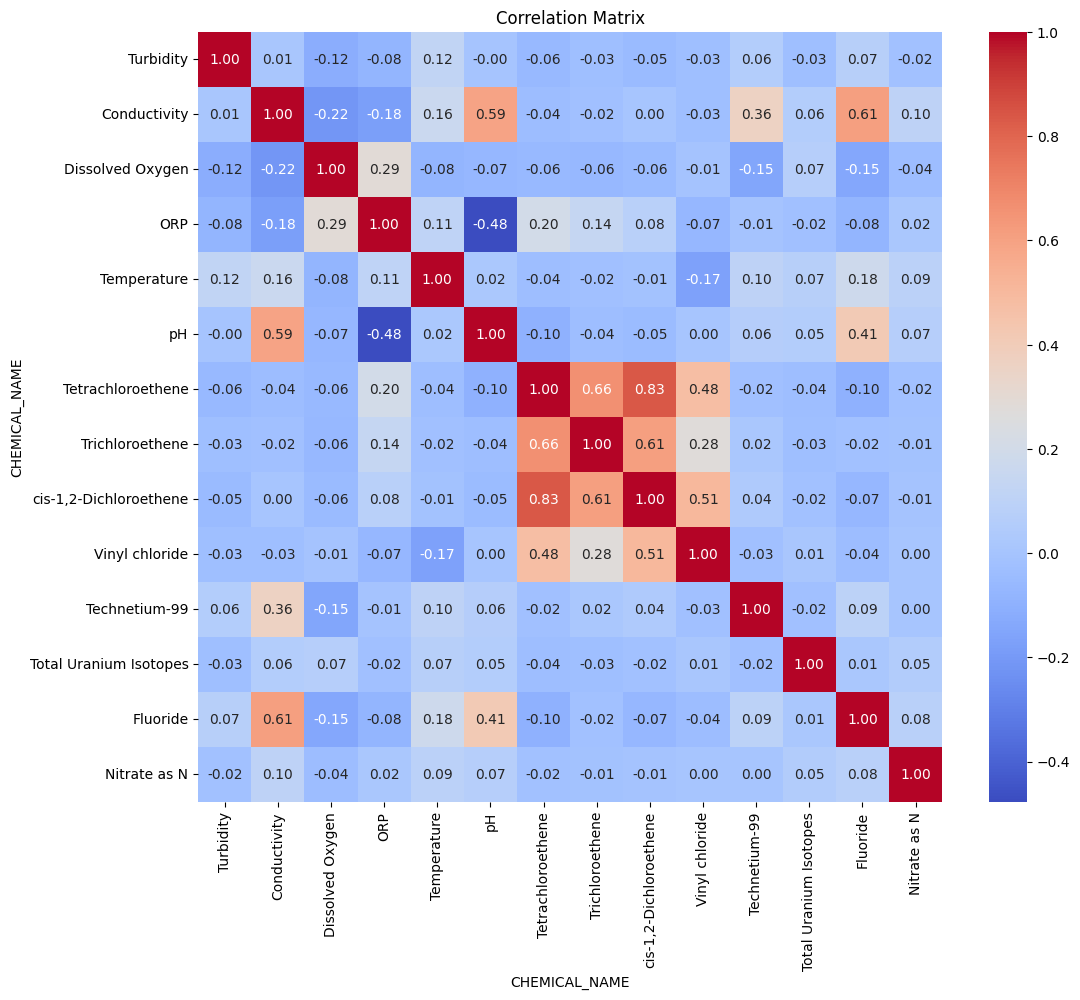

In [54]:
# Specify the columns for the correlation matrix
columns = ['Turbidity', 'Conductivity', 'Dissolved Oxygen', 'ORP', 'Temperature',
           'pH', 'Tetrachloroethene', 'Trichloroethene', 'cis-1,2-Dichloroethene',
           'Vinyl chloride', 'Technetium-99', 'Total Uranium Isotopes', 'Fluoride',
           'Nitrate as N']

# Calculate the correlation matrix
corr_matrix = dfCorr_cleaned[columns].corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


This matrix shows us that strongest correlation occurs between PCE and its daughter products.  This isn't a surprise.  However, there are some other slight correlations with conductivty and fluoride, and conductivity and pH.

In [55]:
# Calculate descriptive statistics
descriptive_stats = df.describe()
print("\nDescriptive Statistics:")
print(descriptive_stats)


Descriptive Statistics:
CHEMICAL_NAME       X_COORD        Y_COORD   Turbidity  Conductivity  \
count          1.120000e+03    1120.000000  471.000000    471.000000   
mean           2.023923e+06  745170.699714   10.174119    327.136624   
std            8.326755e+02     758.845179   29.569620    638.030788   
min            2.021984e+06  742114.330000    0.000000      0.000000   
25%            2.023433e+06  744728.030000    0.000000     83.082430   
50%            2.024065e+06  745162.260000    1.360000    139.349700   
75%            2.024296e+06  745638.922500    9.690000    267.190550   
max            2.027345e+06  746811.200000  488.580000   5649.250000   

CHEMICAL_NAME  Dissolved Oxygen         ORP  Temperature          pH  \
count                471.000000  471.000000   471.000000  471.000000   
mean                   1.882229  124.585350    20.766921    6.001975   
std                    2.264044  123.748134     2.972783    0.927380   
min                    0.050000 -189.7


Next, I wanted to create one chart per CHEMICAL_NAME where the X axis is the LOC_NAME sorted in Alphanumeric order ascending, and the Y axis is based on string value groupings in descending order and the plotted point is the REPORT_RESULT_VALUE for the dataframe dfChem

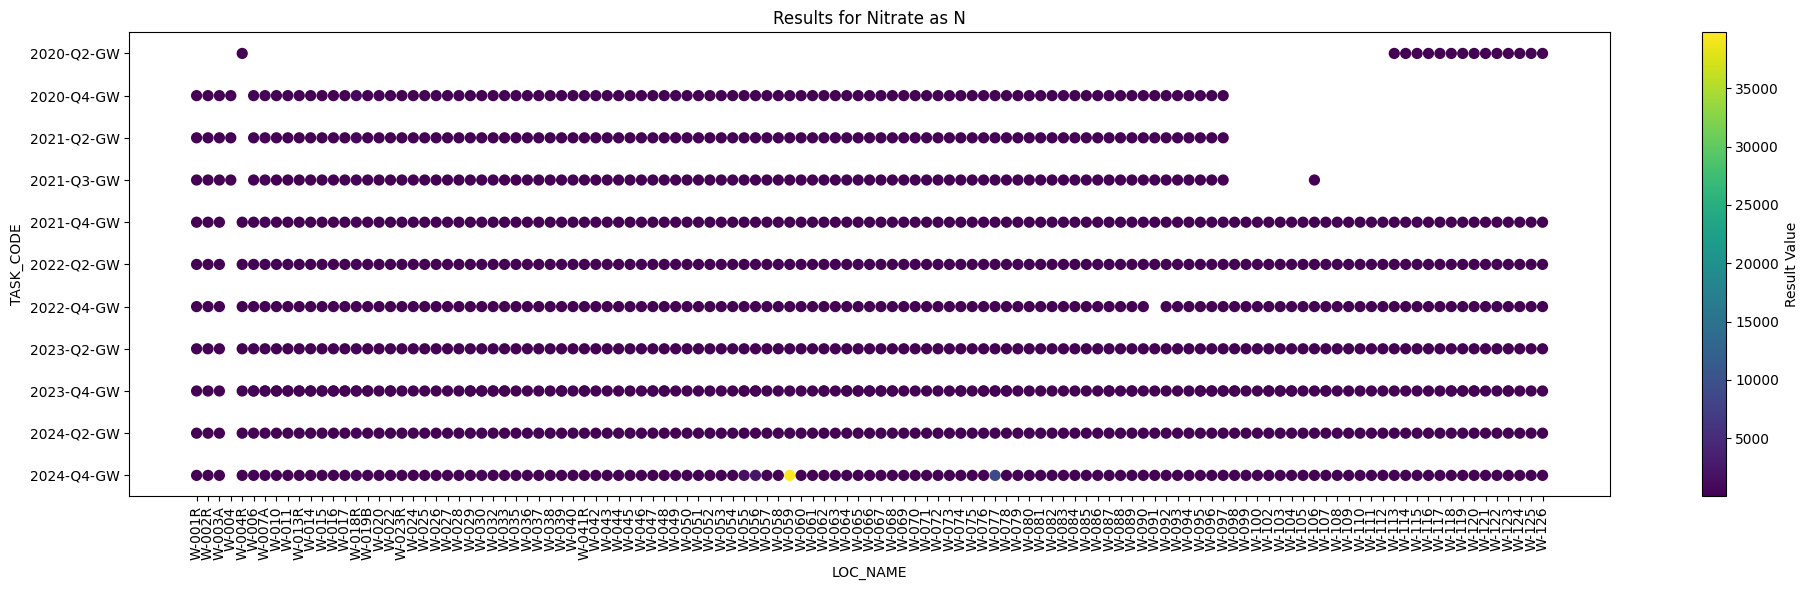

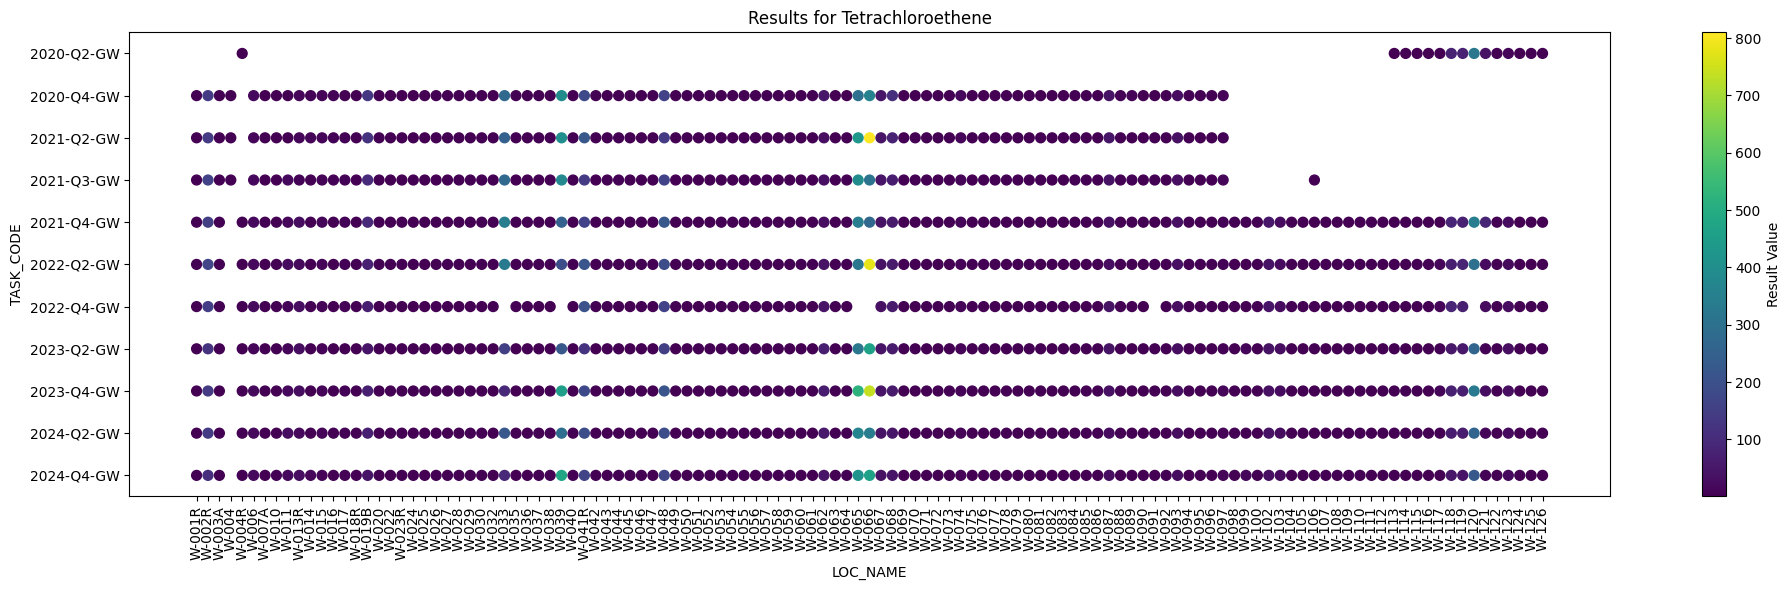

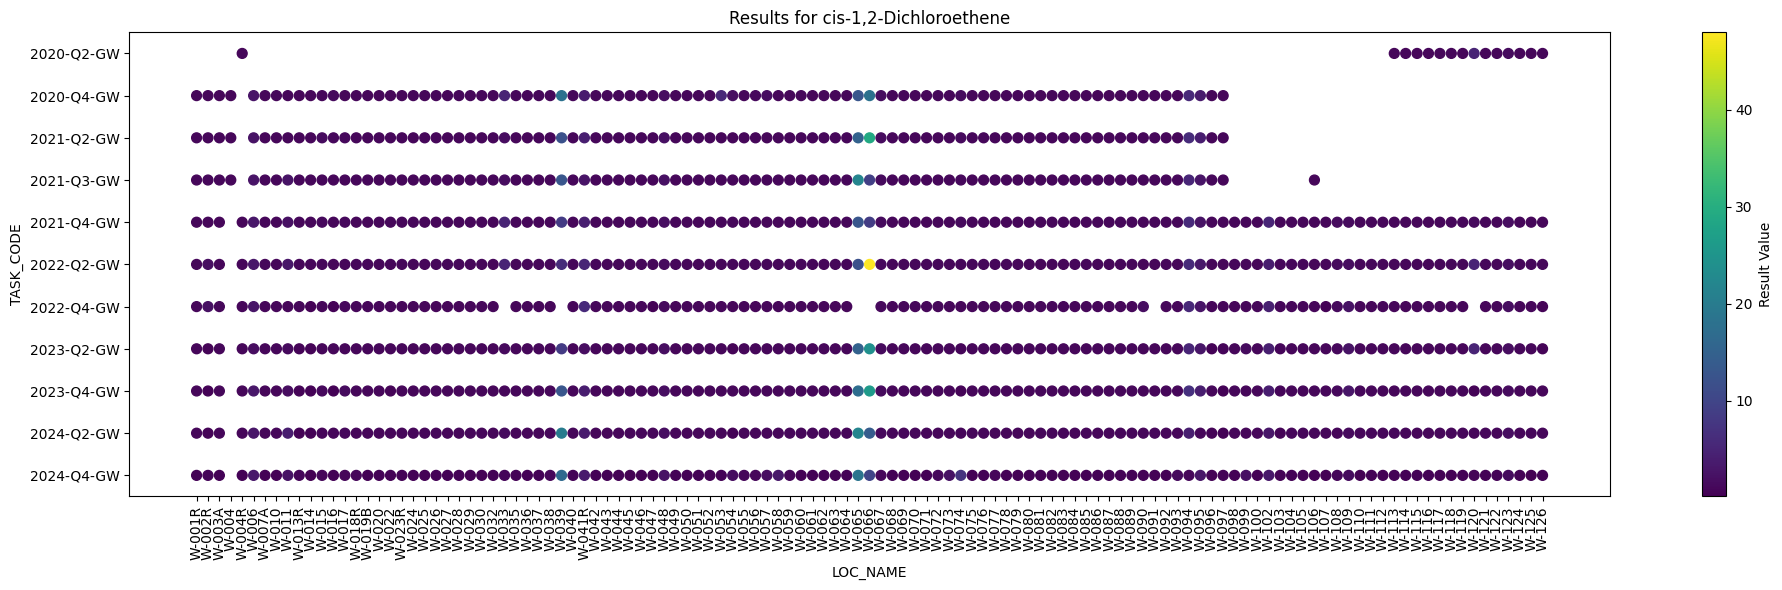

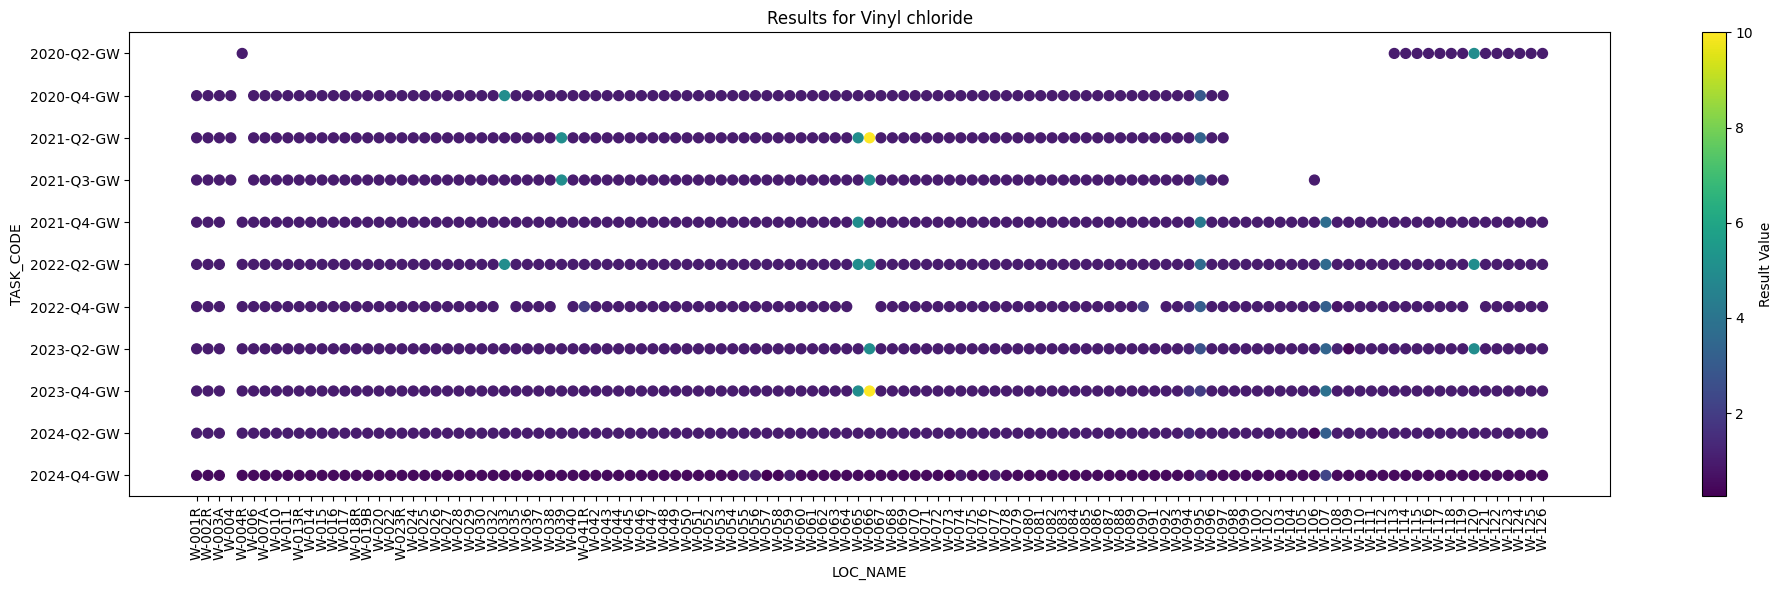

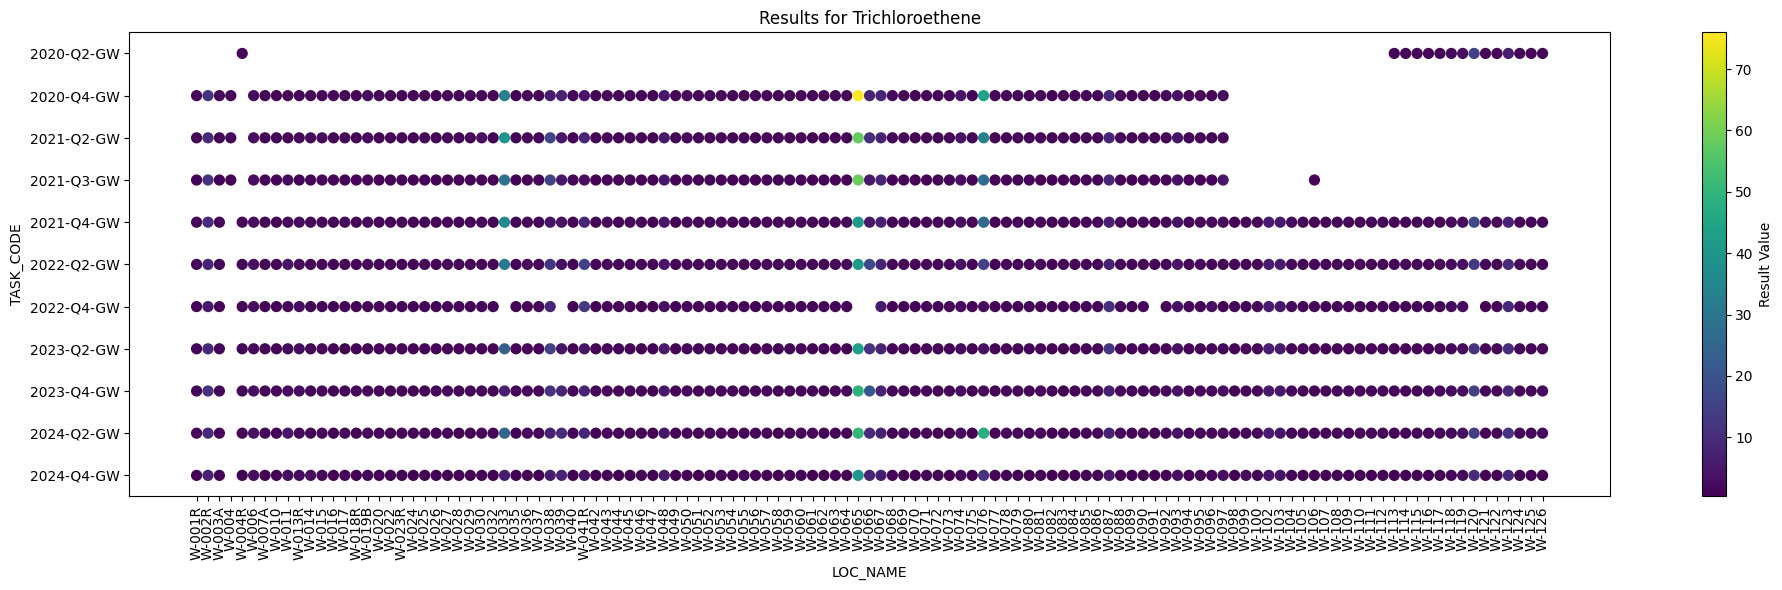

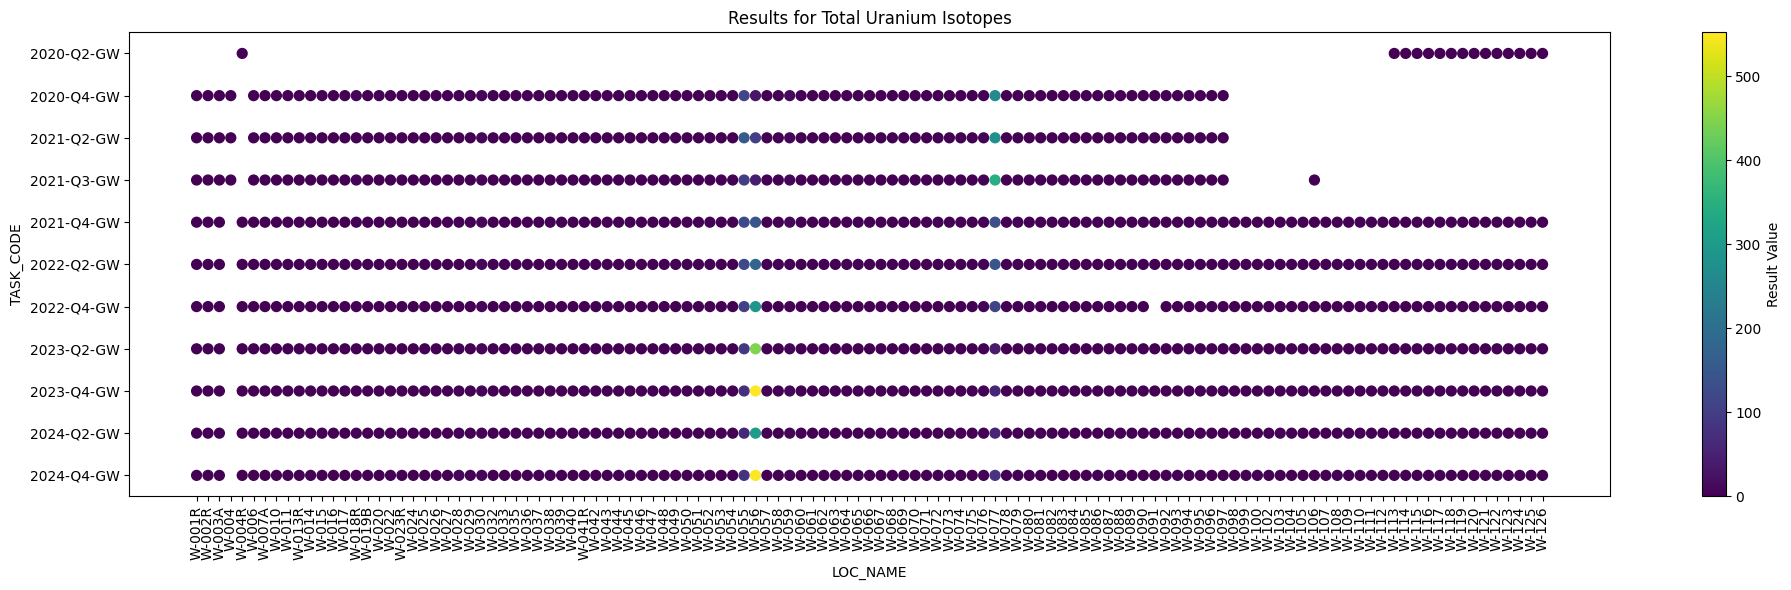

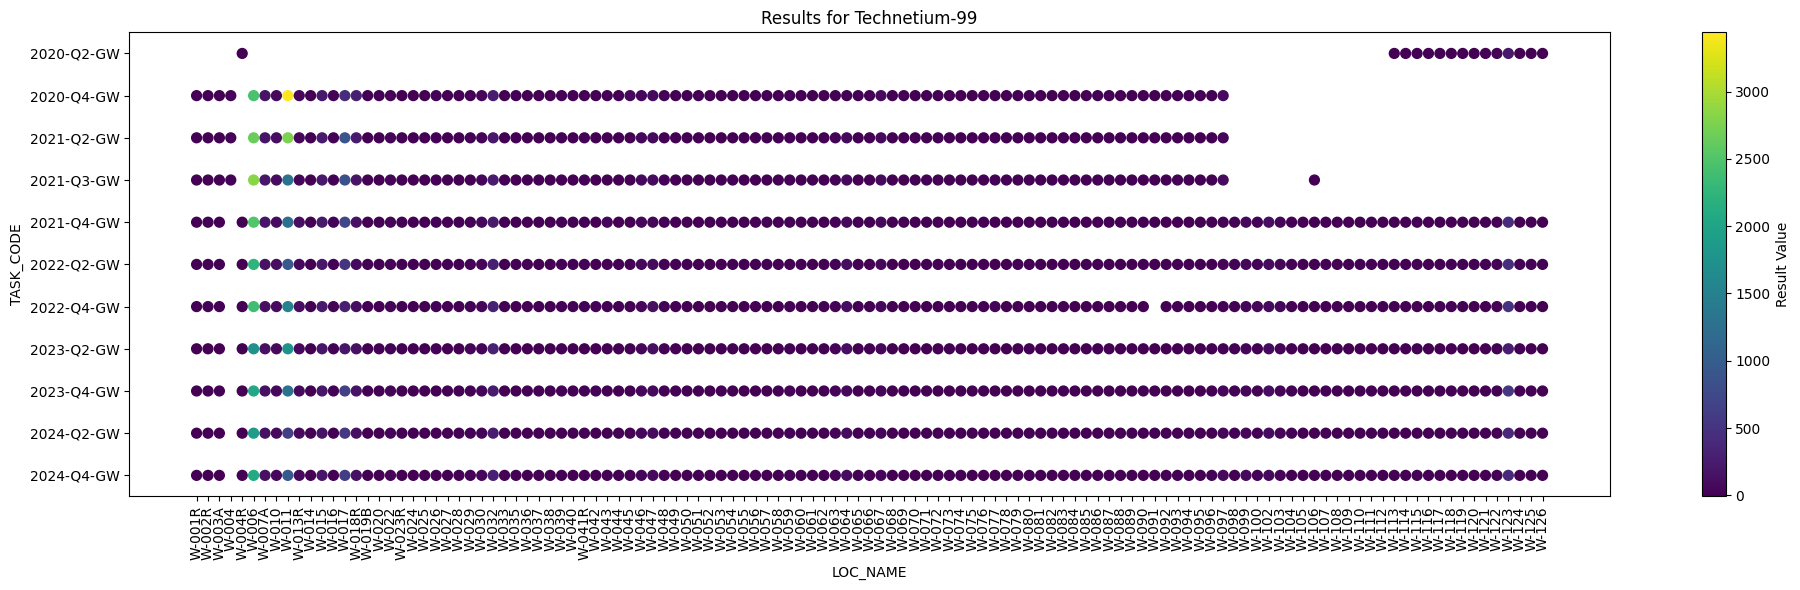

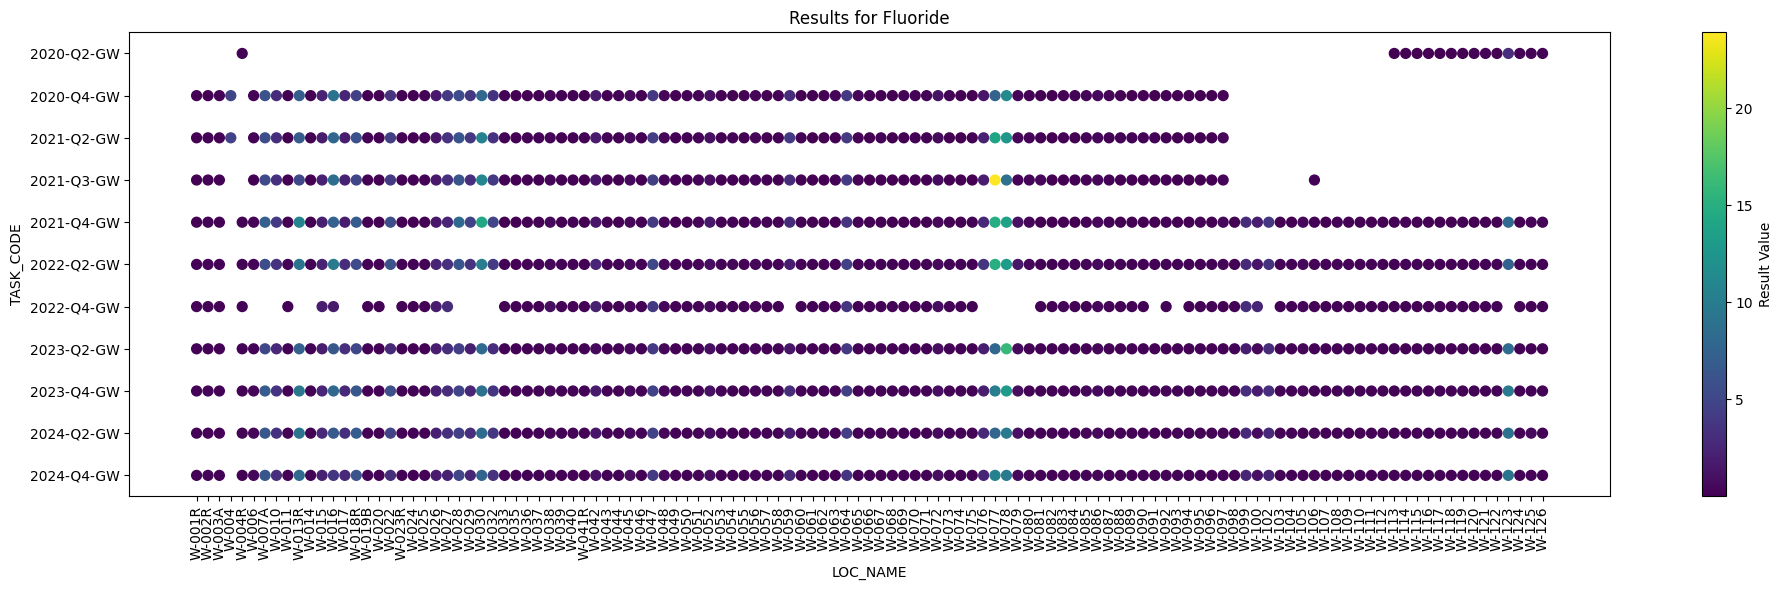

In [56]:
# Group by CHEMICAL_NAME and iterate
for chemical_name in dfChem['CHEMICAL_NAME'].unique():
    chemical_df = dfChem[dfChem['CHEMICAL_NAME'] == chemical_name].copy()

    # Sort by LOC_NAME in ascending order and TASK_CODE in descending order
    chemical_df = chemical_df.sort_values(by=['LOC_NAME', 'TASK_CODE'], ascending=[True, False])

    # Create the plot
    fig, ax = plt.subplots(figsize=(20, 6))

    # Scatter plot with color mapping based on REPORT_RESULT_VALUE using viridis colormap
    scatter = ax.scatter(chemical_df['LOC_NAME'], chemical_df['TASK_CODE'],
                         c=chemical_df['REPORT_RESULT_VALUE'], cmap='viridis', s=50)

    # Add a colorbar
    cbar = fig.colorbar(scatter)
    cbar.set_label('Result Value')

    ax.set_xlabel('LOC_NAME')
    ax.set_ylabel('TASK_CODE')
    ax.set_title(f'Results for {chemical_name}')
    plt.xticks(rotation=90, ha='center')

    # Fix Y axis to recognize string values in descending order
    unique_dates = sorted(chemical_df['TASK_CODE'].unique(), reverse=True)
    ax.set_yticks(range(len(unique_dates)))
    ax.set_yticklabels(unique_dates)

    plt.tight_layout()
    plt.show()

Based on these plots, PCE is most present at W-066 and W-067.  Let's take a look at a line plot at this well for PCE and its daughters at these two locations.  

Let's create a subplot of two graphs, one for LOC_NAME W-066 and one for W-067 showing CHEMICAL_NAME for Tetrachloroethene, Trichloroethene, cis-1,2-Dichloroethene, and Vinyl chloride results along the Y axis, and the SAMPLE_DATE along the X axis

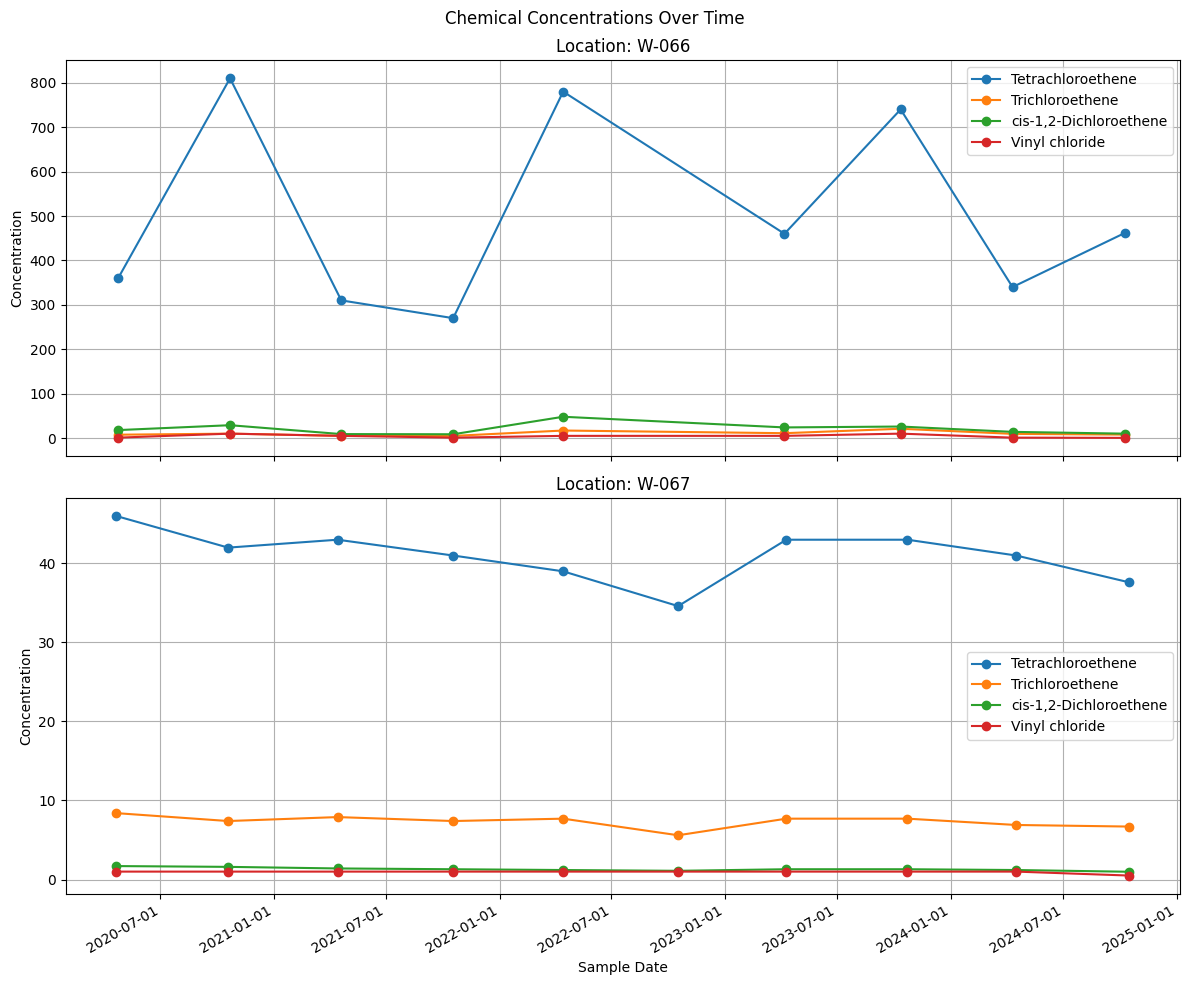

In [57]:
# Filter for relevant locations and chemicals
locations = ['W-066', 'W-067']
chemicals = ['Tetrachloroethene', 'Trichloroethene', 'cis-1,2-Dichloroethene', 'Vinyl chloride']
filtered_df = dfChem[
    (dfChem['LOC_NAME'].isin(locations)) &
    (dfChem['CHEMICAL_NAME'].isin(chemicals))
]

# Convert SAMPLE_DATE to datetime objects
filtered_df['SAMPLE_DATE'] = pd.to_datetime(filtered_df['SAMPLE_DATE'])

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
fig.suptitle('Chemical Concentrations Over Time')

# Iterate over locations and create plots
for i, loc in enumerate(locations):
    loc_df = filtered_df[filtered_df['LOC_NAME'] == loc]
    ax = axes[i]

    for chem in chemicals:
        chem_df = loc_df[loc_df['CHEMICAL_NAME'] == chem]
        ax.plot(chem_df['SAMPLE_DATE'], chem_df['REPORT_RESULT_VALUE'], marker='o', label=chem)

    ax.set_title(f'Location: {loc}')
    ax.set_ylabel('Concentration')
    ax.legend()
    ax.grid(True)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    fig.autofmt_xdate()

plt.xlabel('Sample Date')
plt.tight_layout()
plt.show()

These graphs illustrate the inter-relationship of these constituents, as parent and daughter products.  Now let's see a spatial plot based on the XY coordinates for two key dates by creating a subplot of three plots in three columns for df, plot the X_COORD and Y_COORD in South Carolina State Plan feet, using the Tetrachloroethene result for the TASK_CODE 2022-Q2-GW, for 2023-Q4-GW, and for 2024-Q4-GW, using the viridis color ramp

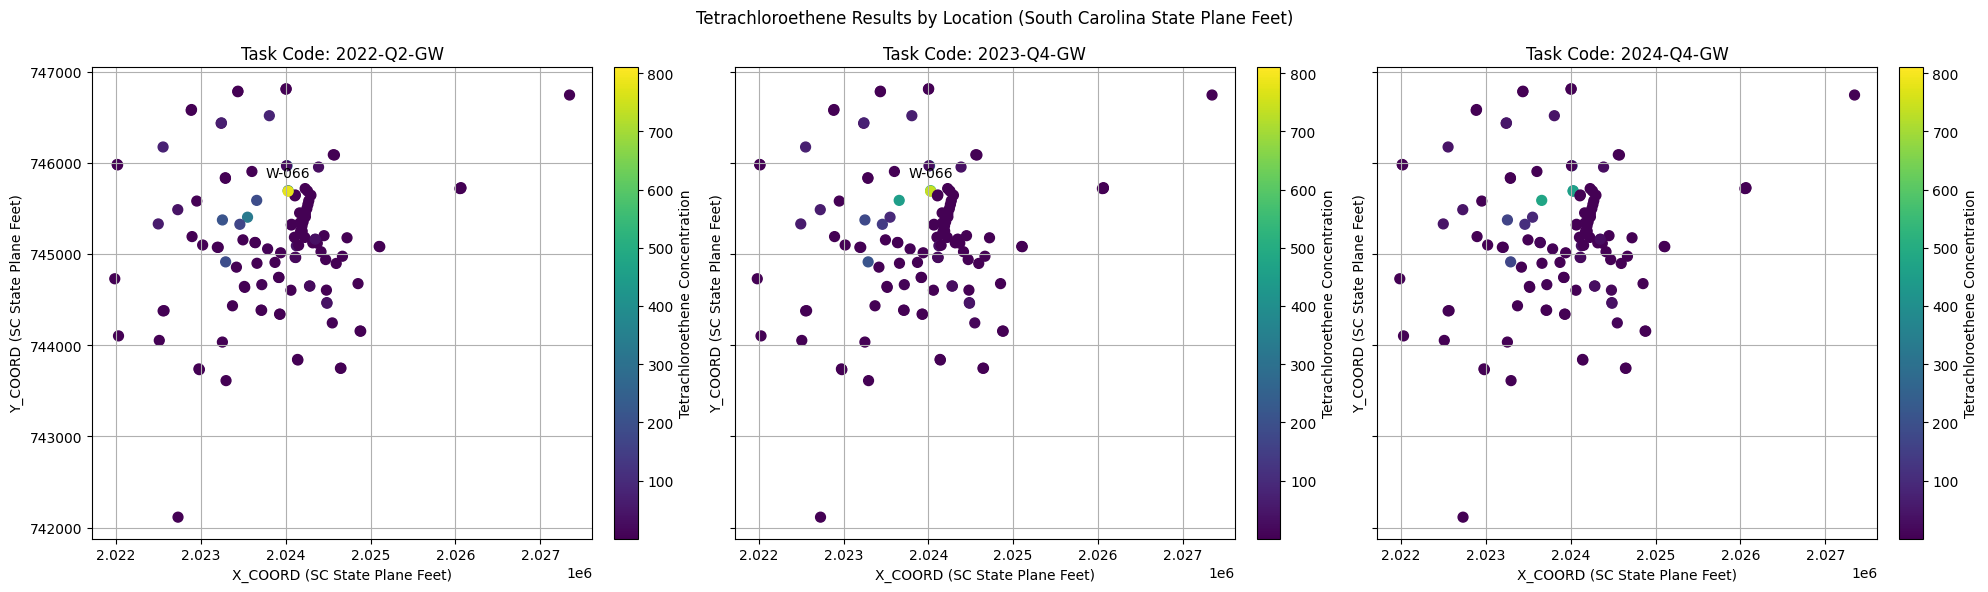

In [58]:
# Filter for Tetrachloroethene
df_pce = dfChem[dfChem['CHEMICAL_NAME'] == 'Tetrachloroethene'].copy()
# Convert SAMPLE_DATE to datetime
df_pce['SAMPLE_DATE'] = pd.to_datetime(df_pce['SAMPLE_DATE'])

# Filter for the required TASK_CODEs
task_codes = ['2022-Q2-GW', '2023-Q4-GW', '2024-Q4-GW']
filtered_dfs = {}
for task_code in task_codes:
    filtered_dfs[task_code] = df_pce[df_pce['TASK_CODE'] == task_code].copy()

# Create the subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharex=True, sharey=True)
fig.suptitle('Tetrachloroethene Results by Location (South Carolina State Plane Feet)')

# Viridis colormap
cmap = plt.get_cmap('viridis')

# Determine the min and max values for the color scale
vmin = df_pce['REPORT_RESULT_VALUE'].min()
vmax = df_pce['REPORT_RESULT_VALUE'].max()

# Plot each TASK_CODE
for i, task_code in enumerate(task_codes):
    df_task = filtered_dfs[task_code]

    # Scatter plot
    scatter = axes[i].scatter(df_task['X_COORD'], df_task['Y_COORD'],
                              c=df_task['REPORT_RESULT_VALUE'], cmap=cmap, s=50, vmin=vmin, vmax=vmax)
    axes[i].set_title(f'Task Code: {task_code}')
    axes[i].set_xlabel('X_COORD (SC State Plane Feet)')
    axes[i].set_ylabel('Y_COORD (SC State Plane Feet)')

    # Add colorbar for each subplot
    cbar = fig.colorbar(scatter, ax=axes[i], fraction=0.046, pad=0.04)
    cbar.set_label('Tetrachloroethene Concentration')
    axes[i].grid(True)

    # Label points with LOC_NAME whose result is greater than 600
    for _, row in df_task[df_task['REPORT_RESULT_VALUE'] > 600].iterrows():
        axes[i].annotate(row['LOC_NAME'], (row['X_COORD'], row['Y_COORD']),
                         textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

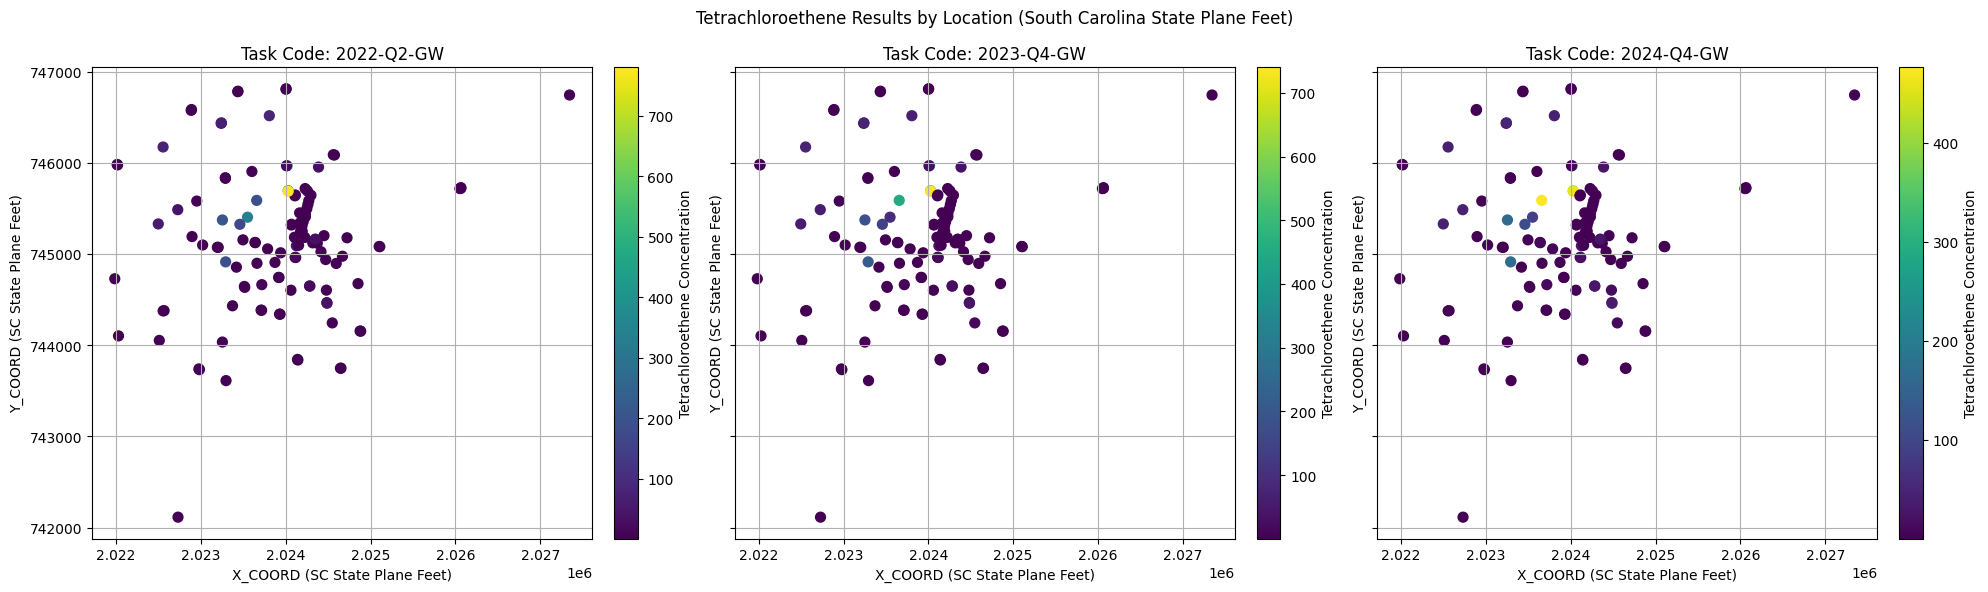

In [59]:
# prompt: create a subplot of three plots in three columns for df, plot the X_COORD and Y_COORD in South Carolina State Plan feet, using the Tetrachloroethene result for the TASK_CODE 2022-Q2-GW, for 2023-Q4-GW, and for 2024-Q4-GW, using the viridis color ramp

# Filter for Tetrachloroethene
df_pce = dfChem[dfChem['CHEMICAL_NAME'] == 'Tetrachloroethene'].copy()
# Convert SAMPLE_DATE to datetime
df_pce['SAMPLE_DATE'] = pd.to_datetime(df_pce['SAMPLE_DATE'])

# Filter for the required TASK_CODEs
task_codes = ['2022-Q2-GW', '2023-Q4-GW', '2024-Q4-GW']
filtered_dfs = {}
for task_code in task_codes:
  filtered_dfs[task_code] = df_pce[df_pce['TASK_CODE'] == task_code].copy()

# Create the subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharex=True, sharey=True)
fig.suptitle('Tetrachloroethene Results by Location (South Carolina State Plane Feet)')

# Viridis colormap
cmap = plt.get_cmap('viridis')

# Plot each TASK_CODE
for i, task_code in enumerate(task_codes):
  df_task = filtered_dfs[task_code]

  # Scatter plot
  scatter = axes[i].scatter(df_task['X_COORD'], df_task['Y_COORD'],
                             c=df_task['REPORT_RESULT_VALUE'], cmap=cmap, s=50)
  axes[i].set_title(f'Task Code: {task_code}')
  axes[i].set_xlabel('X_COORD (SC State Plane Feet)')
  axes[i].set_ylabel('Y_COORD (SC State Plane Feet)')

  # Add colorbar for each subplot
  cbar = fig.colorbar(scatter, ax=axes[i], fraction=0.046, pad=0.04)
  cbar.set_label('Tetrachloroethene Concentration')
  axes[i].grid(True)
plt.tight_layout()
plt.show()
